# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [ ]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder



In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Comp Vision/Project /Project 7/')
path='.'

In [ ]:
project_path = '/content/drive/My Drive/Colab Notebooks/Comp Vision/Project /Project 7/'
pinrest=project_path + ' Pinterest.zip'

### Extract the zip file
- Extract Aligned Face Dataset from Pinterest.zip

***Below code need execute only first time. It creats PINS folder for extracted data.Second time onwards it take long time to execute.***

In [ ]:
# This code might be execute first time only, second & onward it take long time 
from zipfile import ZipFile
with ZipFile(pinrest, 'r') as z:
  z.extractall()


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [ ]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image
- Load one image using the function "load_image"

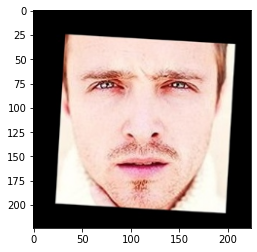

In [ ]:
import matplotlib.pyplot as plt
img_path = metadata[0].image_path()
img = load_image(img_path)
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
plt.imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [ ]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [ ]:
metadata.shape

(10770,)

### Generate embeddings for all images
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))
embeddings = []
#for i in range(metadata.shape[0]): This take hours for iteration of 10K plus images for project purpose only executed first 200 images.
for i in range(200):
  img_path = metadata[i].image_path()
  img = load_image(img_path)
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  embeddings.append(embedding_vector)

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    #img = align_image(img)
    # scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    # obtain embedding vector for image
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

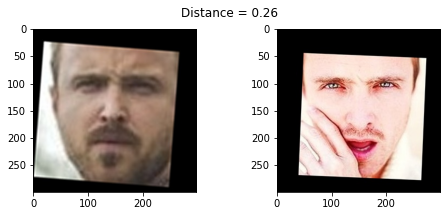

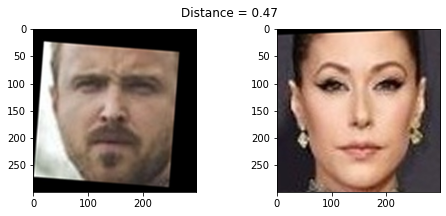

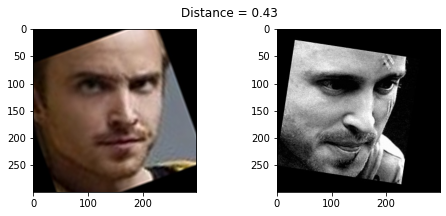

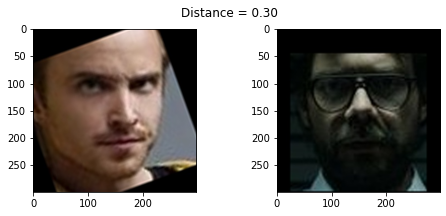

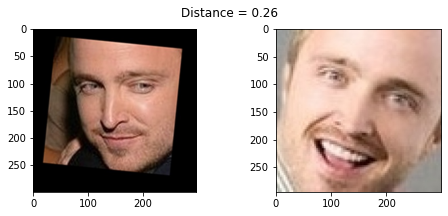

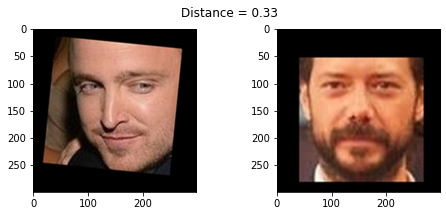

In [ ]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
targets = np.array([m.name for m in metadata])
encoder.fit(targets)
y=encoder.transform(targets)
y_train = y[train_idx]
y_test = y[test_idx]
    


### Standardize the feature values
- Scale the features using StandardScaler

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # transform the train & test set
X_test_scaled = scaler.fit_transform(X_test)

### Reduce dimensions using PCA
- Reduce feature dimensions using Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2,random_state=100)
X_train_pca= pca.fit_transform(X_train_scaled)
X_test_pca= pca.fit_transform(X_test_scaled)


### Build a Classifier
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
svm=SVC()
svm.fit(X_train, y_train)
#svm.fit(X_test_scaled, y_train)
#svm.fit(X_train_pca, y_train)
acc_svm1 = accuracy_score(y_test, svm.predict(X_test))
#acc_svm2 = accuracy_score(y_test, svm.predict(X_test_scaled))
#acc_svm3 = accuracy_score(y_test, svm.predict(X_test_pca))

print(f'Score1 = {acc_svm1}')

Score1 = 0.960735171261487


### Test results
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

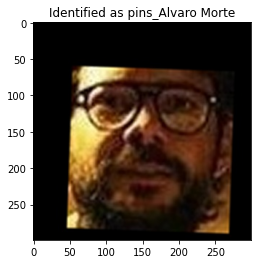

In [ ]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svm.predict([X_test[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [ ]:
test_idx.shape

(10770,)